In [4]:
import pandas as pd

# Load the data
data = pd.read_csv("Apr_Jun_2023_Douglasville_Police_Department_report.csv")

In [5]:
data.shape

(3101, 10)

In [6]:
data.head


<bound method NDFrame.head of            ccn                     date               updateDate  \
0     23007708   07/01/2023, 6:05:00 AM  07/04/2023, 12:44:48 AM   
1     23007694  07/01/2023, 12:21:00 AM  07/04/2023, 12:44:46 AM   
2     23007690  06/30/2023, 10:21:00 PM  07/04/2023, 12:44:44 AM   
3     23007686   06/30/2023, 8:13:00 PM  07/04/2023, 12:00:31 AM   
4     23007674   06/30/2023, 7:01:00 PM  07/03/2023, 10:36:38 PM   
...        ...                      ...                      ...   
3096  23003696   04/01/2023, 4:56:00 PM   04/02/2023, 6:14:06 AM   
3097  23003700   04/01/2023, 6:13:00 PM   04/02/2023, 6:14:06 AM   
3098  23003695   04/01/2023, 4:42:00 PM   04/02/2023, 6:14:06 AM   
3099  23003693   04/01/2023, 3:46:00 PM   04/02/2023, 6:14:06 AM   
3100  23003690   04/01/2023, 8:57:00 AM  04/01/2023, 10:05:02 PM   

              city state postalCode                  blocksizedAddress  \
0     DOUGLASVILLE    GA          .            7000 Block DOUGLAS BLVD   
1    

Data Source Description:
Data Source: Douglasville Police Department Crime Data
Time Period: April to June 2023
File Name: Apr_Jun_2023_Douglasville_Police_report.csv
Data Link: [https://cityprotect.com/agency/dpd/download]

Main Inquiry Question:
What are the crime trends in Douglasville from April to June 2023?

Sub-questions:
How does the distribution of different types of crimes vary during this period?
(Investigate the frequency of each crime type and identify the most common)

Is there a temporal pattern in crime occurrence, such as time of day or day of the week?
(Explore whether certain hours or days are associated with higher crime rates.)

Are there any geographical patterns in crime locations within Douglasville?
(Analyze crime hotspots or clusters on a map to identify areas with higher crime rates.)

In [7]:
#The first thing I am going to do is check the datatypes.
# Check data types
data_types = data.dtypes
print(data_types)

ccn                    int64
date                  object
updateDate            object
city                  object
state                 object
postalCode            object
blocksizedAddress     object
incidentType          object
parentIncidentType    object
narrative             object
dtype: object


In [8]:
 #I am not going to drop any features because I believe all of them will be necessary at some point in my project

#None of the data types of the columns need to be change either, they are all correct


 



In [9]:
#Now I will check the data for missing values
missing_values = data.isnull().sum()
print(missing_values)

ccn                   0
date                  0
updateDate            0
city                  0
state                 0
postalCode            0
blocksizedAddress     0
incidentType          0
parentIncidentType    0
narrative             0
dtype: int64


In [10]:
#Now I will check for duplicate values
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ccn, date, updateDate, city, state, postalCode, blocksizedAddress, incidentType, parentIncidentType, narrative]
Index: []


In [11]:
#Here I am going to check for any inconsistant inputs: 
# List of categorical columns to check for inconsistencies
categorical_columns = ['city', 'state', 'postalCode', 'incidentType', 'parentIncidentType']

# Loop through each categorical column
for column in categorical_columns:
    # Get the unique values in the column
    unique_values = data[column].unique()
    
    # Print the column name and its unique values
    print(f"Column: {column}")
    print("Unique Values:", unique_values)

Column: city
Unique Values: ['DOUGLASVILLE' 'LITHIA SPRINGS' 'WINSTON' 'DOUGLASVILLKE' 'AUSTELL'
 'VILLA RICA' 'MARIETTA']
Column: state
Unique Values: ['GA']
Column: postalCode
Unique Values: ['.' '30135' '30134' '30122' '30060' '30180' '30008']
Column: incidentType
Unique Values: ['larceny - other offenses' 'matter of record'
 'suspicious persons / vehicles' 'welfare check' 'disturbance'
 'traffic - all other offenses' 'theft by shoplifting'
 'damage to property - private' 'vgcsa - marijuana - sales of'
 'warrant arrest - other agency' 'domestic disturbance'
 'simple assault / simple battery' 'accident'
 'vgcsa - marijuana - possession of' 'sexual battery'
 'larceny - articles from vehicle' 'motor vehicle theft - automobile'
 'vgcsa - opium or derivative - possession of' 'dui - alcohol'
 'burglary - forced entry - residence' 'failure to appear'
 'damage to property (no criminal intent)' 'suicide / attempted suicide'
 'flight / escape - other' 'mentally ill / psychiatric case'
 'terro

In [12]:
#From the previous results, I can see that there is an issue in the City column. There is Douglasville and then there is 
# Douglasvillke. Douglasvillke is not a real place. 
#I will correct that by adding the following code.

data['city'] = data['city'].replace('DOUGLASVILLKE', 'DOUGLASVILLE')

# Get the unique values in the "city" column
unique_cities = data['city'].unique()

# Print the column name and its unique values
print("Column: city")
for city in unique_cities:
    print(city)

Column: city
DOUGLASVILLE
LITHIA SPRINGS
WINSTON
AUSTELL
VILLA RICA
MARIETTA


In [13]:
#Check for numeric variables, check any outliers
#I am not going to do this step because I do not have any nummeric variables in my data.
#I have numeric values for zip code, however, all of those values are correct. 

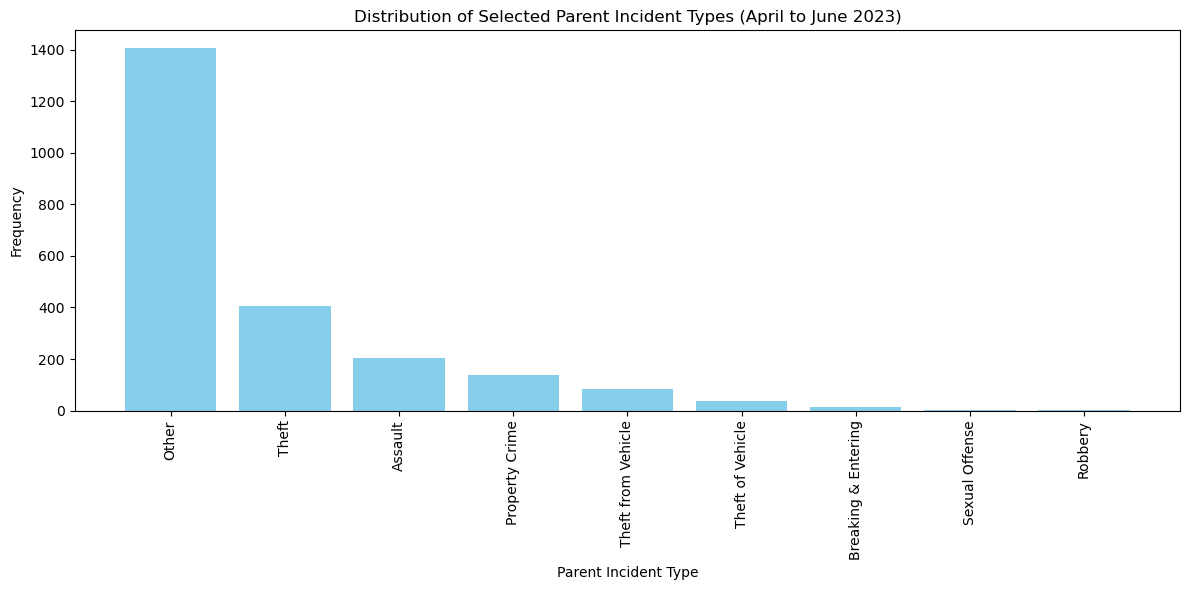

In [26]:
#Here I am processing the data for my first question which is: How does the distribution of different types of crimes vary during this period? 
#(Investigate the frequency of each crime type and identify the most common)
#I am grouping the crimes by there parentIncidentType so that I can see what type of crime is the most common



# List of parent incident types to include in the chart
parent_incident_types_to_include = ['Theft', 'Other', 'Property Crime', 'Assault', 'Theft from Vehicle', 'Theft of Vehicle', 'Breaking & Entering', 'Sexual Offense', 'Robbery']

# Filter the data to include only specified parent incident types
filtered_data = data[data['parentIncidentType'].isin(parent_incident_types_to_include)]

# Count the frequencies of the included parent incident types
parent_incident_counts = filtered_data['parentIncidentType'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(parent_incident_counts.index, parent_incident_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Parent Incident Type')
plt.ylabel('Frequency')
plt.title('Distribution of Selected Parent Incident Types (April to June 2023)')
plt.tight_layout()
plt.show()

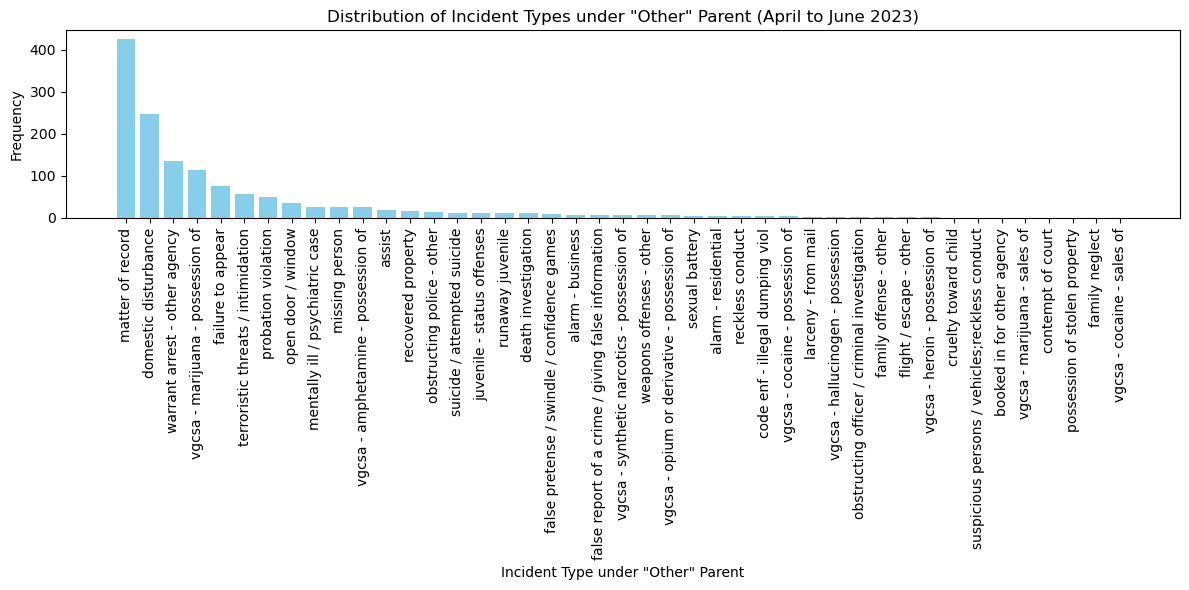

In [15]:
#I am continuing to evaluate the data for my first question in this cell as well.
#In the last cell, "Other" was the most common crime. In order to see what "Other" meant,
# I created a seperate graph to look at the specific crimes marked as "Other".
import matplotlib.pyplot as plt

# Filter the data for rows where 'parentIncidentType' is 'Other'
other_parent_incidents = data[data['parentIncidentType'] == 'Other']

# Count the frequencies of each incident type under 'Other'
incident_type_counts = other_parent_incidents['incidentType'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(incident_type_counts.index, incident_type_counts.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Incident Type under "Other" Parent')
plt.ylabel('Frequency')
plt.title('Distribution of Incident Types under "Other" Parent (April to June 2023)')
plt.tight_layout()
plt.show()

My first question to answer is: How does the distribution of different types of crimes vary during this period? (Investigate the frequency of each crime type and identify the most common). 

By looking at these two graphs, I can begin to see some trends. The three most common crimes in the time period between April and June 2023 are: "Other", "Theft", and "Assualt". However, that leads to other questions as it is not clear what "Other" exactly means.

That is why I created the second graph, which breaks down each of the crimes catagorized as "Other". Of the crimes marked "Other", the three most common are "domestic disturbance", "warrant arrests", and "marijuana possession". 

When you look at the two graphs side-by-side, the three total most common crimes are actually, "Theft", "Domestic Disturbance", and "Assualt" in that order. 

The results from these two graphs show that "Theft", "Domestic Disturbance", and "Assualt" are the most common crimes in Douglasville right now. Thus, the police department should consider allocating more resources to targeting these particular crimes. 

Another thing that I want to make note of is that I think the "Other" catagory needs to be changed by the police department. It is too misleading and consists of a wide variety of different, unrelated crimes. I suggest adding additional parentIncidentType columns to help improve this issue and improve data analysis. 

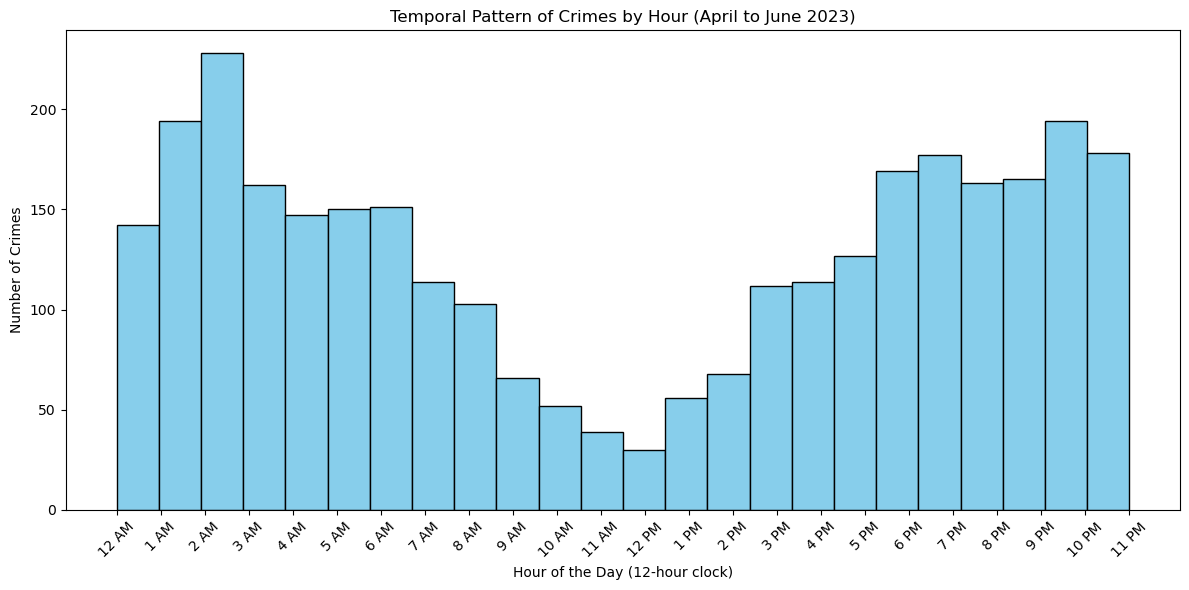

In [16]:
#Here I am creating a graph that organizes the crimes by what time of day they were commited.
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'date' column to a datetime object if it's not already done
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y, %I:%M:%S %p')  # Updated format

# Extract the hour from the 'date' column
data['hour'] = data['date'].dt.hour

# Create a histogram to show the distribution of crimes by hour
plt.figure(figsize=(12, 6))
plt.hist(data['hour'], bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day (12-hour clock)')
plt.ylabel('Number of Crimes')
plt.title('Temporal Pattern of Crimes by Hour (April to June 2023)')
plt.xticks(range(24), ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                       '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'], rotation=45)  # Updated labels
plt.tight_layout()
plt.show()







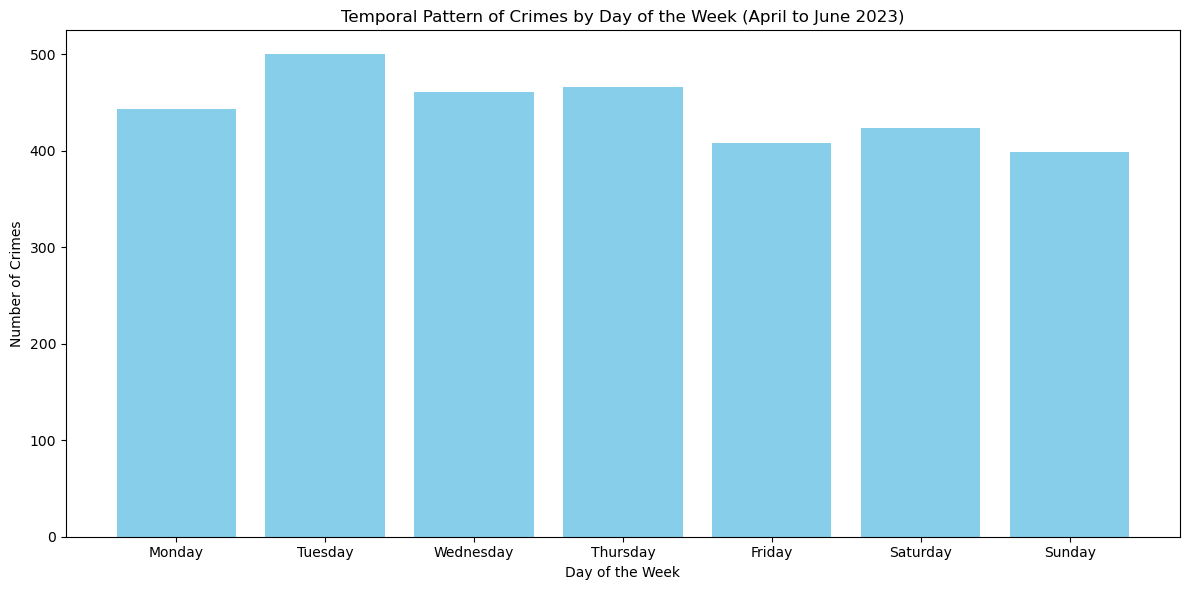

In [17]:
#This graph will organize the crimes commited based on what day of the week they were committed.
# Extract the day of the week from the 'date' column 
data['day_of_week'] = data['date'].dt.dayofweek

# Create a bar chart to show the distribution of crimes by day of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = data['day_of_week'].value_counts().reindex(range(7), fill_value=0)

plt.figure(figsize=(12, 6))
plt.bar(day_names, day_counts, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Temporal Pattern of Crimes by Day of the Week (April to June 2023)')
plt.tight_layout()
plt.show()


Based on the information provided by these two graphs, we can determine several patterns in the data. In the first graph, there is a clear trend that the most of the crime occurs in the evening/overnight hours of the day. As the morning hours pass until around noon, the crime is decreasing. As the afternoon moves into the overnight hours, the crime rate continues to increase. This is an indicator that the police department should spend more time and resources dedicated to the evening hours when more crime is likely to occur. This will allow for the best allocation and use of resources.

In the second graph, crime is oranized by the day of the week in which it was committed. This reveals a trend that I found interesting. The data shows that crime is pretty evenly dispersed throughout the week, no day showed a noticable increase in crime compared to the other days. This means that the police department does not need to have more officers working on one particular day, but can instead spread out resources and manpower throughout the week. 

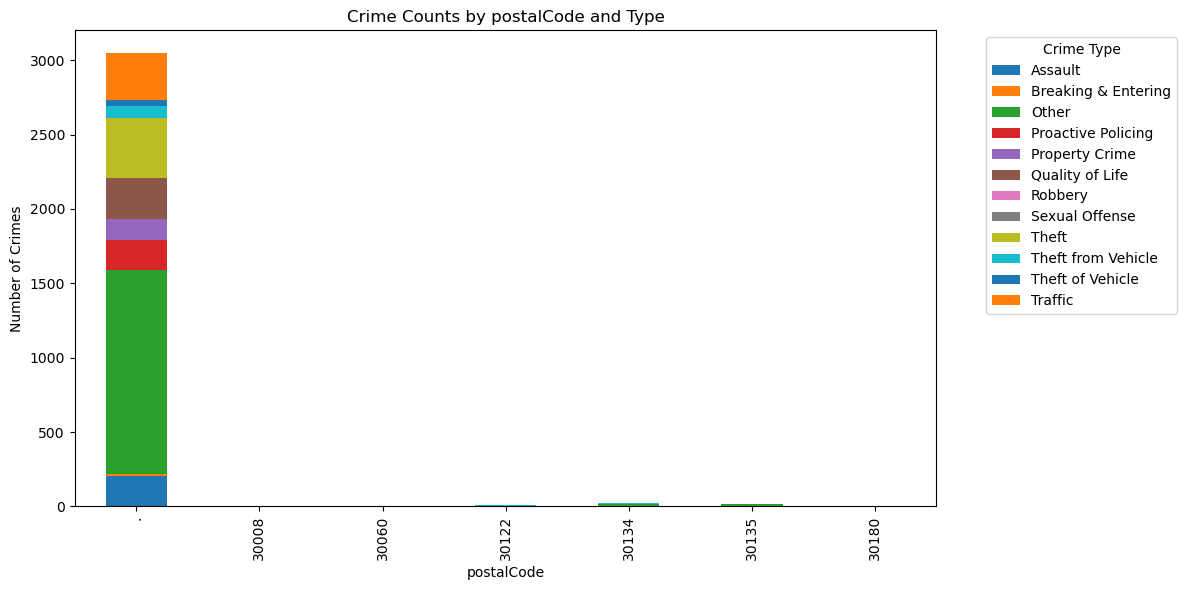

In [28]:
#Here is where I encountered a significant issue with the data.
#Apparently, the police department marked most of the postal codes as "." in the data. 
# I am not sure why they did that, maybe for privacy reasons.


import matplotlib.pyplot as plt
import pandas as pd



# Group the data by city and parentIncidentType and count the number of crimes
crime_counts = data.groupby(['postalCode', 'parentIncidentType']).size().unstack(fill_value=0)

# Create a grouped bar chart
crime_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Counts by postalCode and Type')
plt.xlabel('postalCode')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.tight_layout()
plt.show()

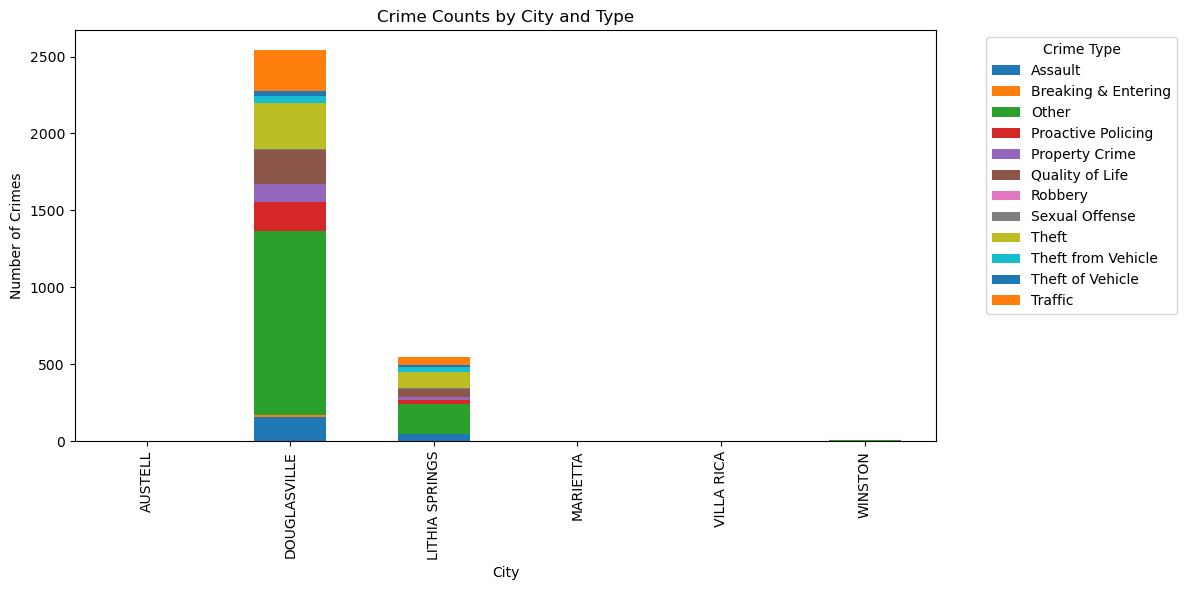

In [21]:
#Because of the previously mentioned issues with the postal code data,
# I also looked at the crime and grouped it by city. This Will help get a better look as to where the crime is located.
import matplotlib.pyplot as plt
import pandas as pd



# Group the data by city and parentIncidentType and count the number of crimes
crime_counts = data.groupby(['city', 'parentIncidentType']).size().unstack(fill_value=0)

# Create a grouped bar chart
crime_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Counts by City and Type')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.tight_layout()
plt.show()





The two above graphs attempt to answer the question: Are there any geographical patterns in crime locations within Douglasville? (Analyze crime hotspots or clusters on a map to identify areas with higher crime rates.).
Here I ran into a serious issue with the data. The police department marked most of the postal codes with a ".", instead of the actual code. In doing so, it prevents me from finding out where the majority of the crimes are taking place. I attempted to find the results I was looking for by creating a chart of the crimes by address. However, there were too many addresses for that to work. 

That is where the second graph comes in, (Crime Counts by City and Type). I created this graph and grouped crime by city. It gives us the information that most of the crimes committed are committed in Douglasville. This information is not as detailed or complete as I would like. However, it is the best that I can do with the present data. 

I would like to know why the police department did not include postal codes for the majority of the crimes committed. Failure to include them leads to incomplete information and the inability to fully analyze where police resources should be concentrated. 

Summary:

The data shows that  "Theft", "Domestic Disturbance", and "Assualt" are the three most common crimes in Douglasville from April 2023 to June 2023. This information allows us to see what crimes are most prevalent in the city and where the police department should allocate their resources. 

In the "Crimes by Hour" and "Crimes by Day of the Week" graphs, patterns begin to show up. Crime clearly increases the later in the day it gets and slows down in the morning hours. This means that the police department should spend more time patroling and have more officers available during the evening/overnight hours to have the best possible results. The time period between 9 am and 2pm has the least amount of crimes reported in a day. 

The "Crime by Day of the Week" graph provided interesting information as well. It shows a pretty even spread of crime throughout the entire week. No one particular day had much more crime than another. This is helpful for the police department to know that they do not need to increase manpower or resources for any particular day. 

This brings us to our last set of data, the graphs "Crime by postalCode and Type" and "Crime by City and Type". These two graphs were the least helpful based on flaws in the data set. However, they do reveal a few trends that can be helpful. 
In the "Crimes by City and Type" graph, we can see that the majority of crime seems to occur in Douglasville, and not the surrounding places. This means that the police department can focus more of its officers towards the main part of the city where they will have the most positive effect.
Another interesting thing to note in the "Crime by City and Type" graph is that the types of crimes committed in Douglasville and Lithia Springs are very similar and all seem to occur and a similar rate. One particular crime is not more prevalent in one area verses another area. 


Lastly, I want to reference the issues and errors that I ran into with this project and address what I failed to find. 
There were several big issues that I discovered with the data set from the Douglasville Police department. 

The first issue can be observed in the graph titled "Distribution of Selected Parent Incident Types (April to June 2023)".
The majority of the crimes are catagorized as "Other". But what does "Other" mean? I had to create a different graph to find out what "Other" represented. 

"Other" consisted of a large variety of different incidents, some crimes and some not. I believe the police department should look into what incidents are being catagorized as "Other" and see if they can re-organize the list. I think some additional incident catagories should be made and used instead of "Other". That would allow a better picture of what crimes are actually the most common.

The biggest issue I observed can be seen in the graph titled: "Crime Counts by postalCode and Type". For whatever reason, the majority of the incidents have a postal code marked as ".", instead of the actual postal code where the incident took place. This makes it very hard to look at the data and determine trends and learn where the most crime is taking place. This was a major issue and something I believe the police department should look at. In order to get a complete picture of where crime is occuring, the postal code needs to be included. 

By making these changes, I believe the data set will be much more complete and allow for a much better picture of the crime in Douglasville. Making these changes will allow for better analysis and be a better help to the police department. 